In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Display settings
pd.options.display.float_format = '{:,.2f}'.format   # Better readability for large numbers
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid")  # Optional styling
random_state = 42           # For reproducibility

Data Exploration

In [3]:
df = pd.read_excel("../data/online_retail_II.xlsx", sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,"13,085.00",United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,"13,085.00",United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,"13,085.00",United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,"13,085.00",United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"525,461.00",525461,"525,461.00","417,534.00"
mean,10.34,2010-06-28 11:37:36.845017856,4.69,"15,360.65"
min,"-9,600.00",2009-12-01 07:45:00,"-53,594.36","12,346.00"
25%,1.00,2010-03-21 12:20:00,1.25,"13,983.00"
50%,3.00,2010-07-06 09:51:00,2.10,"15,311.00"
75%,10.00,2010-10-15 12:45:00,4.21,"16,799.00"
max,"19,152.00",2010-12-09 20:01:00,"25,111.09","18,287.00"
std,107.42,NaN,146.13,"1,680.81"


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [8]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,"16,321.00",Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,"16,321.00",Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,"16,321.00",Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,"16,321.00",Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,"17,592.00",United Kingdom


In [9]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,"16,321.00",Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,"16,321.00",Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,"16,321.00",Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,"12,605.00",Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,"15,329.00",United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,"15,329.00",United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,"15,329.00",United Kingdom


In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,"-53,594.36",NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,"-44,031.79",NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,"-38,925.87",NaN,United Kingdom


In [12]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [13]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [14]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,"13,085.00",United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,"13,085.00",United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,"13,085.00",United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,"13,085.00",United Kingdom


##  Notes on `StockCode` Column

- `StockCode` is expected to follow the pattern **exactly 5 digits** (`[0-9]{5}`), but the dataset contains other valid formats like `[0-9]{5}[a-zA-Z]+`.
- Some entries are **special cases** (administrative, test, or non-product items) and should be excluded from clustering.

### Exclusion / Inclusion Rules

| Code / Pattern       | Description / Reason                                      | Action                     |
|---------------------|-----------------------------------------------------------|----------------------------|
| DCGS                | Legitimate, but quantities negative or Customer ID null   | Exclude                    |
| D                   | Represents discounts                                      | Exclude                    |
| DOT                 | Postage charges                                           | Exclude                    |
| M / m               | Manual transactions                                       | Exclude                    |
| C2                  | Carriage transactions (uncertain meaning)                | Exclude                    |
| C3                  | Only one transaction                                      | Exclude                    |
| BANK CHARGES / B    | Bank charges                                              | Exclude                    |
| S                   | Sample items sent to customers                            | Exclude                    |
| TESTXXX             | Test data                                                 | Exclude                    |
| gift__XXX           | Gift card purchases, no customer info                     | Exclude                    |
| PADS                | Legitimate stock code for padding                         | Include                    |
| SP1002              | Special request items, very few transactions             | Exclude (for now)          |
| AMAZONFEE           | Fees related to Amazon                                     | Exclude (for now)          |
| ADJUSTX             | Manual adjustments by admins                               | Exclude                    |

###  Summary

- Only **relevant product codes** are included in clustering.
- Codes representing **administrative, test, or non-product entries** are excluded.
- Some entries do not strictly follow the 5-digit rule but are still considered valid (`[0-9]{5}[a-zA-Z]+`).


Data cleaning

In [15]:
cleaned_df = df.copy()

In [16]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [17]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    |(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    |(cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [18]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14448\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"406,337.00",406337,"406,337.00","406,337.00"
mean,13.62,2010-07-01 10:11:06.543288320,2.99,"15,373.63"
min,1.00,2009-12-01 07:45:00,0.00,"12,346.00"
25%,2.00,2010-03-26 14:01:00,1.25,"14,004.00"
50%,5.00,2010-07-09 15:48:00,1.95,"15,326.00"
75%,12.00,2010-10-14 17:09:00,3.75,"16,814.00"
max,"19,152.00",2010-12-09 20:01:00,295.00,"18,287.00"
std,97.00,NaN,4.29,"1,677.37"


In [20]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [21]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"406,309.00",406309,"406,309.00","406,309.00"
mean,13.62,2010-07-01 10:14:25.869572352,2.99,"15,373.72"
min,1.00,2009-12-01 07:45:00,0.00,"12,346.00"
25%,2.00,2010-03-26 14:01:00,1.25,"14,006.00"
50%,5.00,2010-07-09 15:48:00,1.95,"15,326.00"
75%,12.00,2010-10-14 17:09:00,3.75,"16,814.00"
max,"19,152.00",2010-12-09 20:01:00,295.00,"18,287.00"
std,97.00,NaN,4.29,"1,677.33"


In [23]:
cleaned_df["Price"].min()

np.float64(0.001)

In [24]:
len(cleaned_df)/len(df)
#Dropped about 23% of records during cleaning

0.7732429238325965

Feature Engineering

In [25]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\HP\AppData\Local\Temp\ipykernel_14448\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,7.50


In [26]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,"12,346.00",169.36,2,2010-06-28 13:53:00
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00
2,"12,348.00",221.16,1,2010-09-27 14:59:00
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00
4,"12,351.00",300.93,1,2010-11-29 15:23:00


In [27]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10


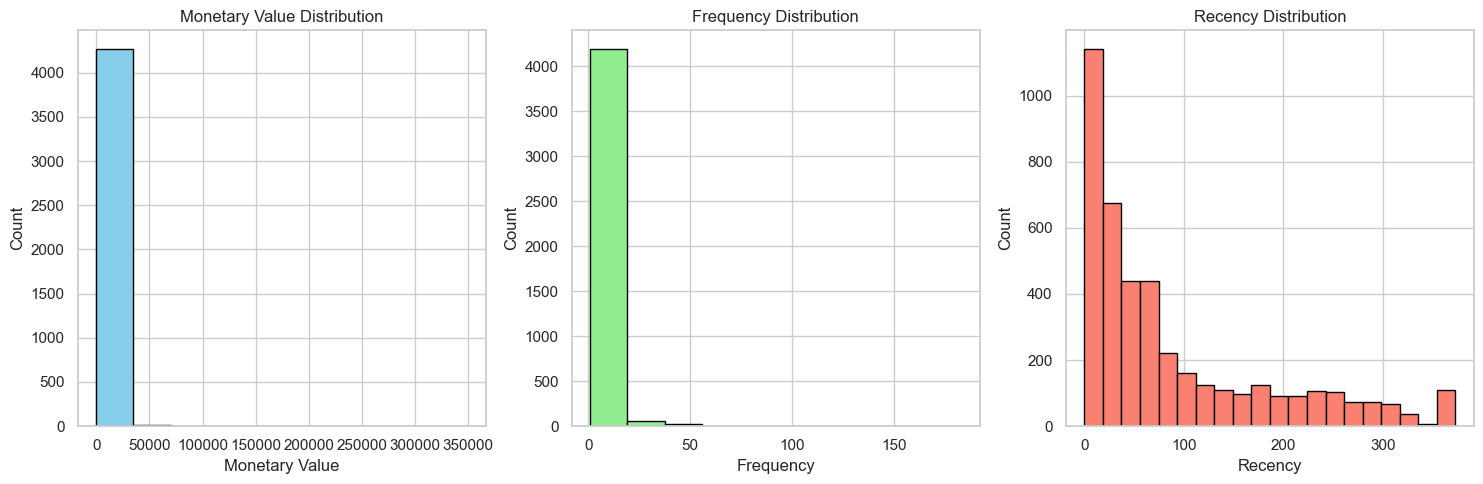

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

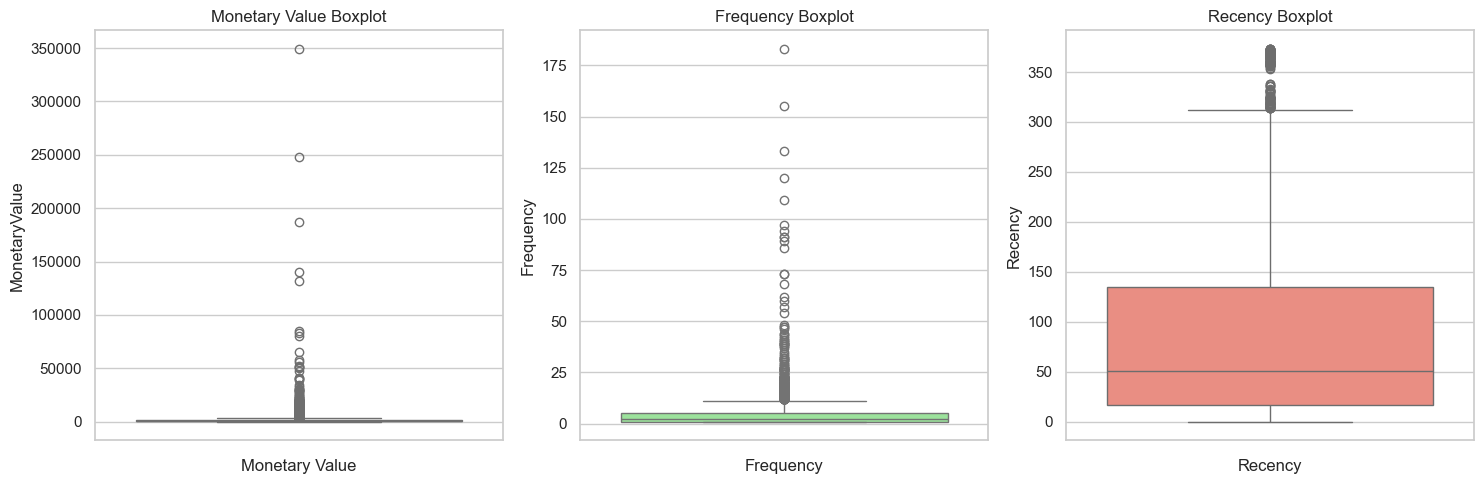

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [30]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,"15,103.04","12,188.10",17.17,2010-11-09 12:26:02.978723328,30.04
min,"12,357.00","3,802.04",1.00,2009-12-10 18:03:00,0.00
25%,"13,622.00","4,605.94",8.00,2010-11-08 13:17:30,3.00
50%,"14,961.00","6,191.32",12.00,2010-11-26 12:19:00,13.00
75%,"16,692.00","10,273.24",18.00,2010-12-06 10:34:30,31.00
max,"18,260.00","349,164.35",183.00,2010-12-09 19:32:00,364.00
std,"1,728.66","25,830.85",19.73,NaN,51.54


In [31]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,"15,352.66","14,409.71",23.81,2010-11-23 11:06:20.645161216,16.09
min,"12,437.00","1,094.39",12.00,2010-05-12 16:51:00,0.00
25%,"13,800.00","4,331.56",13.00,2010-11-20 13:14:30,2.00
50%,"15,465.00","6,615.77",17.00,2010-12-02 10:46:00,7.00
75%,"16,828.50","11,692.41",23.00,2010-12-07 11:08:30,19.00
max,"18,260.00","349,164.35",183.00,2010-12-09 19:32:00,211.00
std,"1,748.43","31,381.74",21.93,NaN,26.59


In [32]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,"3,809.00","3,809.00","3,809.00",3809,"3,809.00"
mean,"15,376.48",885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,"12,346.00",1.55,1.00,2009-12-01 10:49:00,0.00
25%,"13,912.00",279.91,1.00,2010-07-08 14:48:00,22.00
50%,"15,389.00",588.05,2.00,2010-10-12 16:25:00,58.00
75%,"16,854.00","1,269.05",4.00,2010-11-17 13:14:00,154.00
max,"18,287.00","3,788.21",11.00,2010-12-09 20:01:00,373.00
std,"1,693.20",817.67,2.24,NaN,98.11


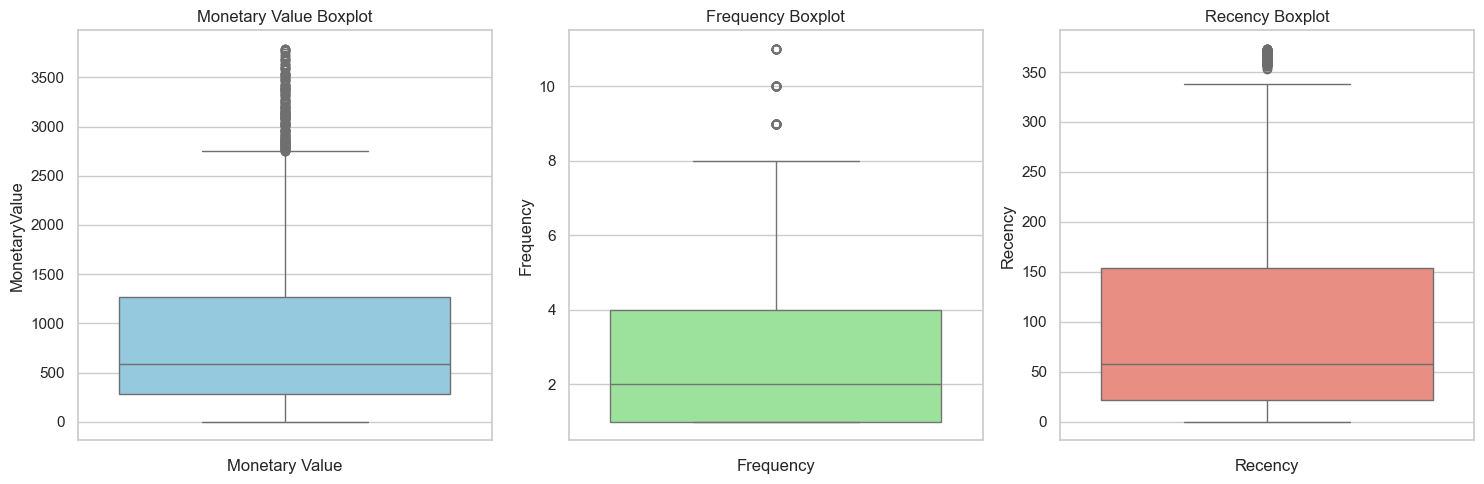

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

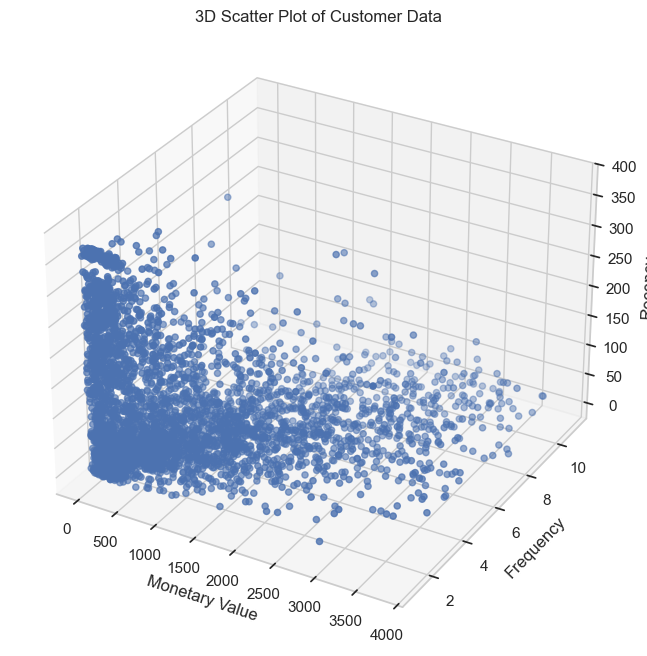

In [34]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [35]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]], shape=(3809, 3))

In [36]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


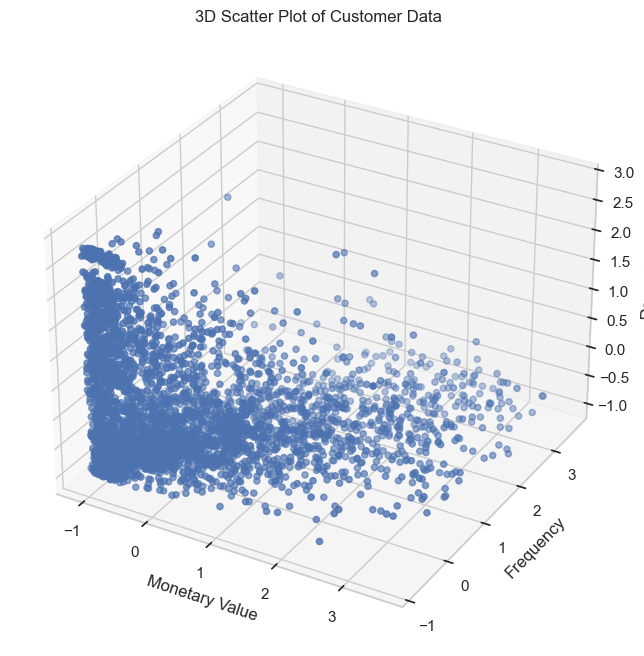

In [37]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

K-Means

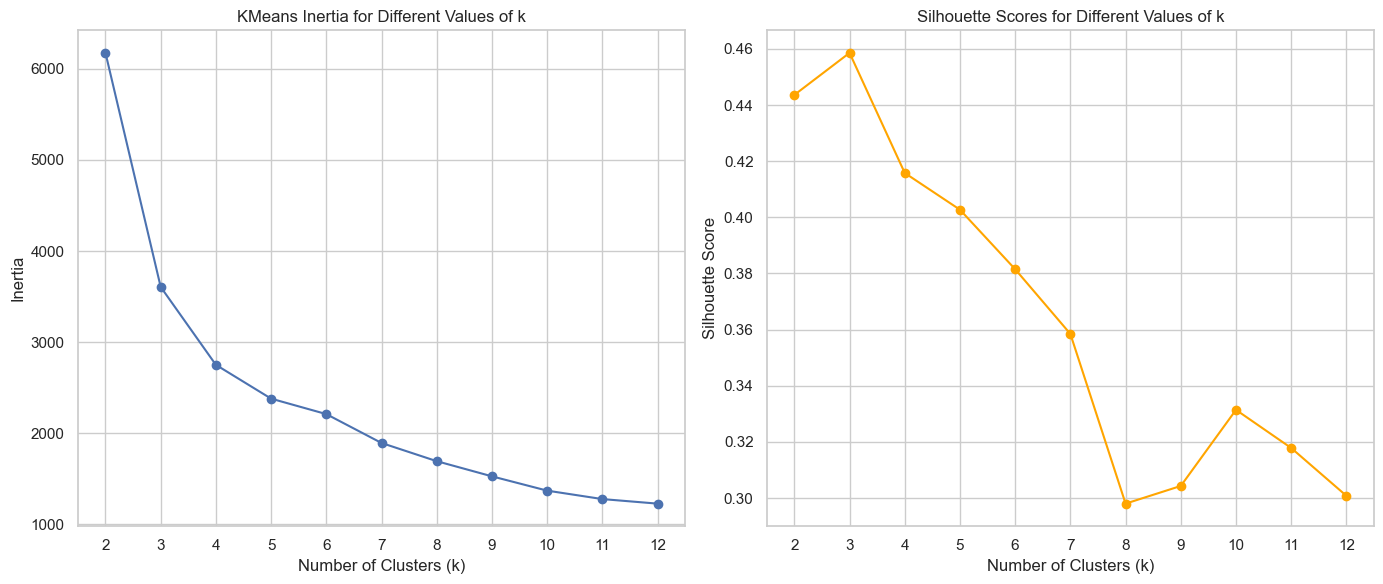

In [38]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=random_state, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=random_state, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [40]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\HP\AppData\Local\Temp\ipykernel_14448\3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,1
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,"18,283.00",641.77,6,2010-11-22 15:30:00,17,0
4281,"18,284.00",411.68,1,2010-10-04 11:33:00,66,2
4282,"18,285.00",377.00,1,2010-02-17 10:24:00,295,1
4283,"18,286.00","1,246.43",2,2010-08-20 11:57:00,111,0


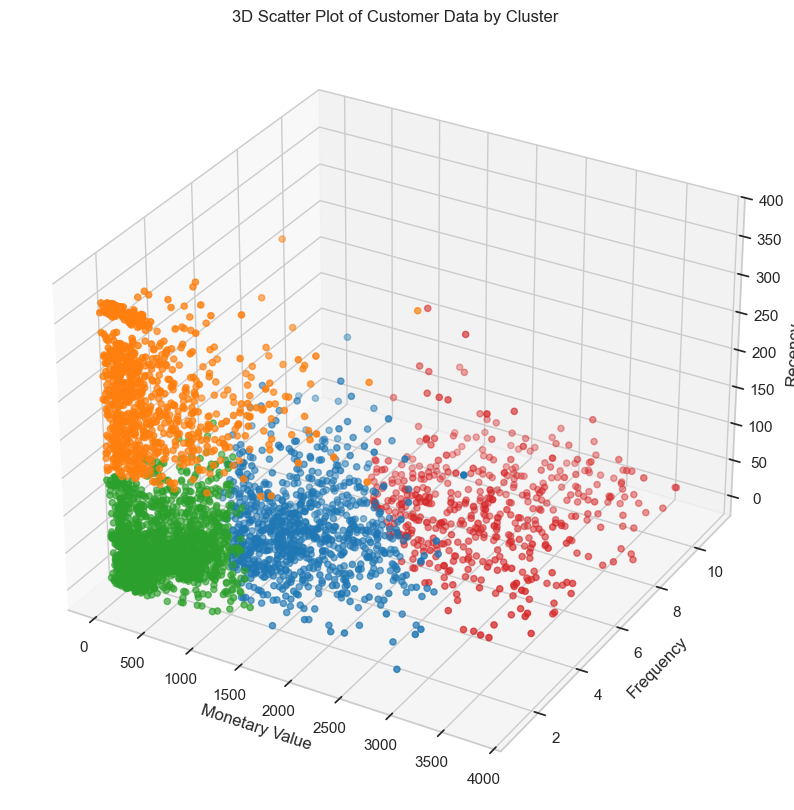

In [41]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

Interpretation

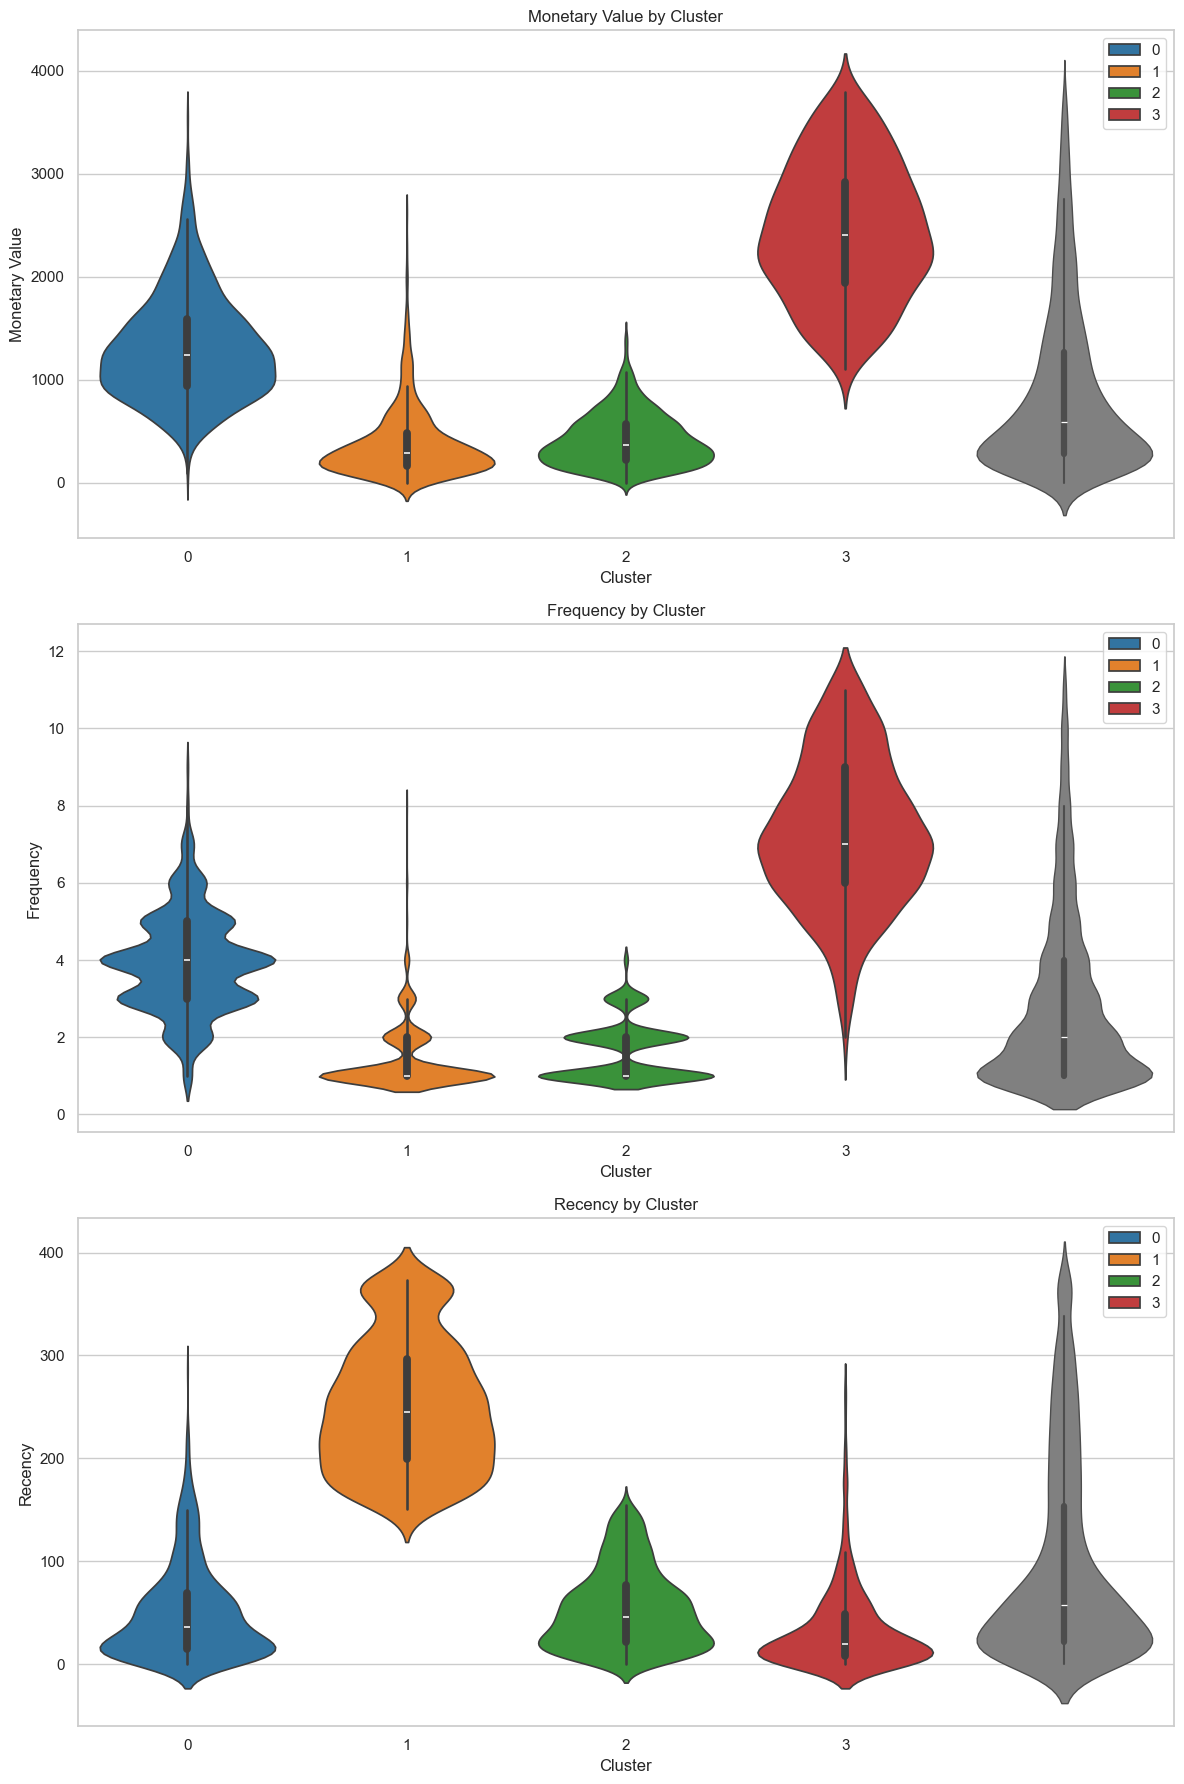

In [42]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster 0 (Blue) 
This cluster represents customers who spend a lot and buy regularly, even if their most recent purchase is not very recent.
The goal is to keep them loyal and active.
Possible actions: loyalty programs, personalized offers, and maintaining regular communication.

Cluster 1 (Orange) 
These customers buy infrequently, spend less, and haven’t made any recent purchases.
The goal here is to bring them back and encourage them to buy again.
Possible actions: targeted marketing campaigns, special discounts, reminder emails, etc.

Cluster 2 (Green) 
This group contains the least active and lowest-value customers, but they have made recent purchases.
They may be new customers or they just need more encouragement.
Possible actions: strengthen the relationship, provide great customer support, and give small incentives to increase their purchasing frequency.

Cluster 3 (Red) 
These are the best customers: very frequent buyers, high spenders, and still active.
The aim is to reward their loyalty and keep them engaged.
Possible actions: exclusive offers, VIP benefits, special rewards, etc.

In [43]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,"12,357.00","11,229.99",1,2010-11-16 10:05:00,23,-1
25,"12,380.00","4,782.84",4,2010-08-31 14:54:00,100,-1
42,"12,409.00","12,346.62",4,2010-10-15 10:24:00,55,-1
48,"12,415.00","19,468.84",4,2010-11-29 15:07:00,10,-1
61,"12,431.00","4,145.52",11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,"18,223.00","7,516.31",12,2010-11-17 12:20:00,22,-3
4236,"18,225.00","7,545.14",15,2010-12-09 15:46:00,0,-3
4237,"18,226.00","6,650.83",15,2010-11-26 15:51:00,13,-3
4241,"18,231.00","4,791.80",23,2010-10-29 14:17:00,41,-3


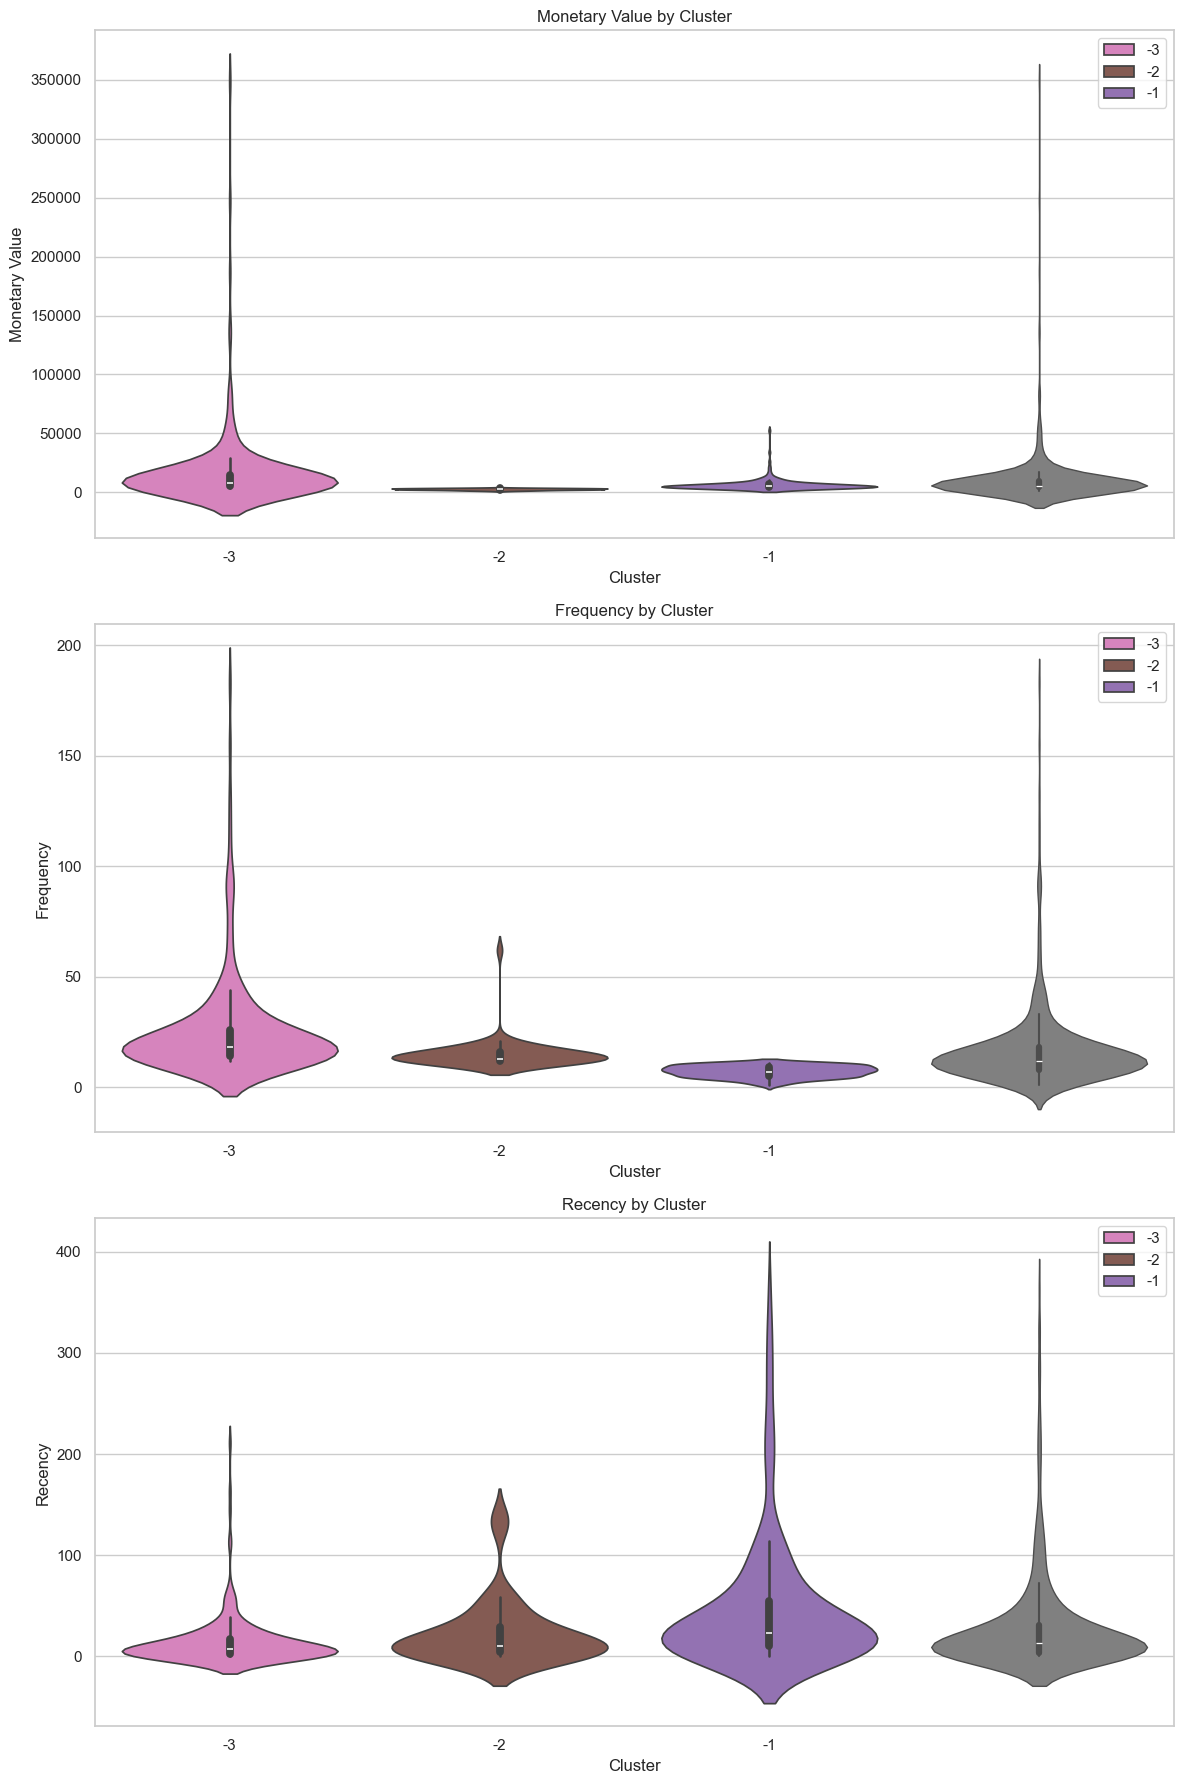

In [44]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster –1 (Monetary Outliers)
Characteristics:
These customers spend a lot of money, but they don’t buy very frequently. Their purchases are large, but not regular.
Potential Strategy:
The goal here is to keep them loyal by giving them a special experience. Personalized offers, premium services, or exclusive discounts can help maintain their interest since they have high spending potential.

Cluster –2 (Frequency Outliers) 
Characteristics:
This group buys very often but spends small amounts each time. They are very engaged, but their monetary value per transaction is low.
Potential Strategy:
Since these customers already buy frequently, they’re good candidates for upselling. We can encourage higher spending through loyalty programs, product bundles, or targeted recommendations.

Cluster –3 (Monetary & Frequency Outliers) 
Characteristics:
These are the most valuable customers: they buy very often and spend a lot. They represent the extreme end of both monetary value and frequency.
Potential Strategy:
This group deserves special attention. VIP programs, exclusive offers, early access to new products, or personalized rewards can help maintain their engagement and make them feel valued.

In [45]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,1
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,"18,223.00","7,516.31",12,2010-11-17 12:20:00,22,-3
4236,"18,225.00","7,545.14",15,2010-12-09 15:46:00,0,-3
4237,"18,226.00","6,650.83",15,2010-11-26 15:51:00,13,-3
4241,"18,231.00","4,791.80",23,2010-10-29 14:17:00,41,-3


In [46]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [47]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0,RETAIN
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0,RETAIN
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,"18,223.00","7,516.31",12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,"18,225.00","7,545.14",15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,"18,226.00","6,650.83",15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,"18,231.00","4,791.80",23,2010-10-29 14:17:00,41,-3,DELIGHT


In [48]:
full_clustering_df.to_csv("full_clustering_preprocessed.csv", index=False)


Visualisation

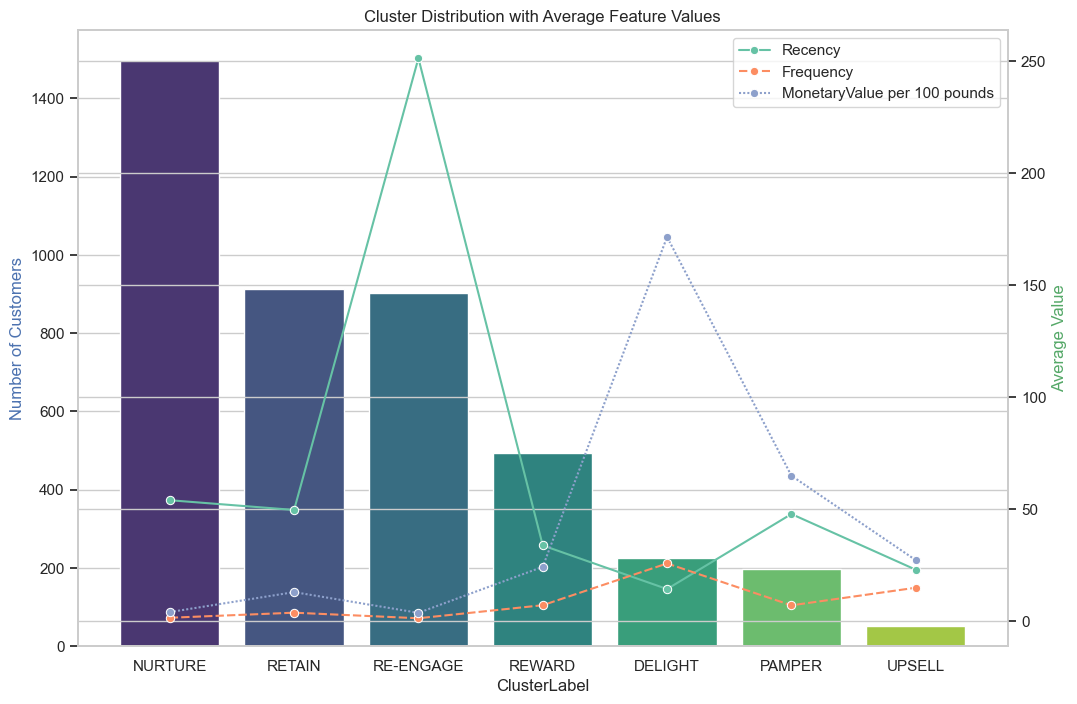

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue"] = full_clustering_df["MonetaryValue"]
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()